## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

In [1]:
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

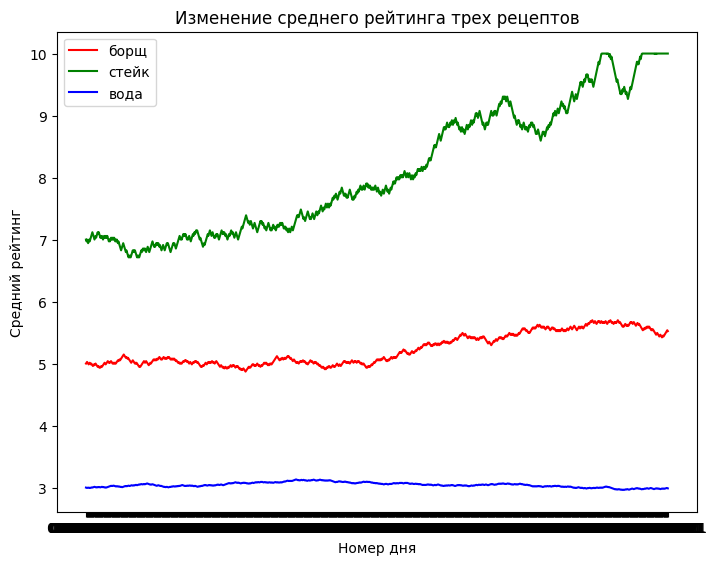

In [22]:
data = np.load('average_ratings.npy')

start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
delta = timedelta(days=1)

dates = []
current_date = start_date

while current_date <= end_date:
    dates.append(current_date.strftime("%d.%m.%Y"))
    current_date += delta

fig = plt.figure()
ax = fig.add_axes([1.0, 1.0, 1.0, 1.0])

y1_line, = ax.plot(dates, data[0], 'r', label = 'борщ')
y2_line, = ax.plot(dates, data[1], 'g', label = 'стейк')
y3_line, = ax.plot(dates, data[2], 'b', label = 'вода')

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.legend(handles=[y1_line, y2_line, y3_line], loc='upper left')
ax.set_title('Изменение среднего рейтинга трех рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


Text(0.5, 1.0, 'Изменение рейтинга трёх рандомных рецепта')

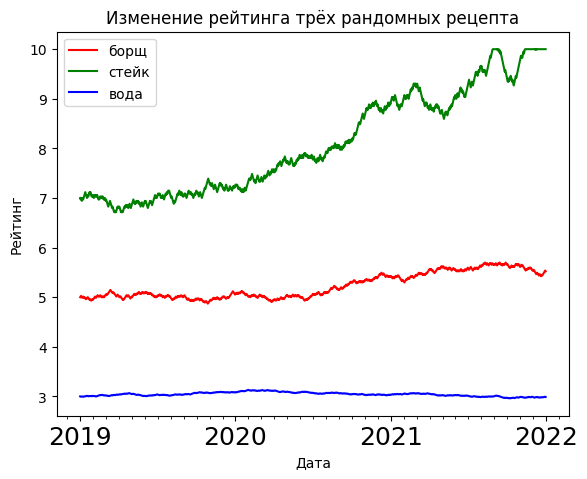

In [25]:
from matplotlib.ticker import AutoMinorLocator
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = ['борщ', 'стейк', 'вода']
y1_line, = ax.plot(dates, data[0], 'r', label = labels[0])
y2_line, = ax.plot(dates, data[1], 'g', label = labels[1])
y3_line, = ax.plot(dates, data[2], 'b', label = labels[2])

ax.set_xticks(['01.01.2019', '01.01.2020', '01.01.2021', '30.12.2021'])
ax.set_xticklabels([r'2019', r'2020', r'2021', '2022'], fontsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(12))

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.legend(handles=[y1_line, y2_line, y3_line], loc='upper left')
ax.set_title('Изменение среднего рейтинга трех рецептов')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

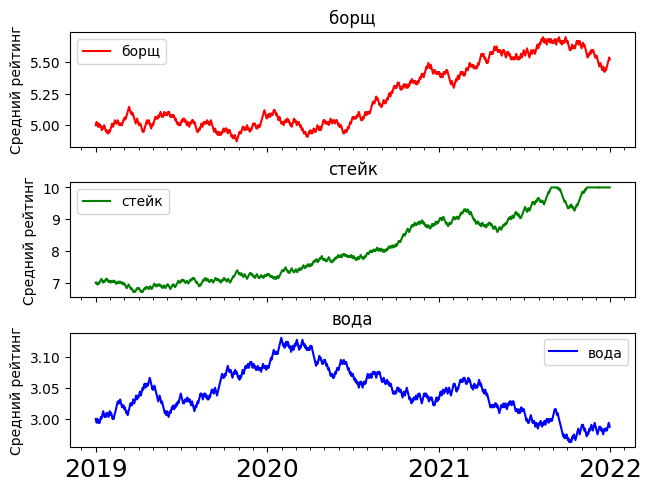

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, layout="constrained", sharex='col')

colors = ['r', 'g', 'b']

for i, axi in enumerate(axes):
    axi.plot(dates, data[i], colors[i])
    axi.set_xticks(['01.01.2019', '01.01.2020', '01.01.2021', '30.12.2021'])
    axi.set_xticklabels([r'2019', r'2020', r'2021', '2022'], fontsize=18)
    axi.xaxis.set_minor_locator(AutoMinorLocator(12))
    axi.set_ylabel('Средний рейтинг')
    axi.set_title(labels[i])
    axi.plot([], [], label=labels[i], color=colors[i])
    axi.legend(loc='best')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 1.0, '$𝑦(𝑥)=𝜆𝑒^−$$^𝜆$$^𝑥$')

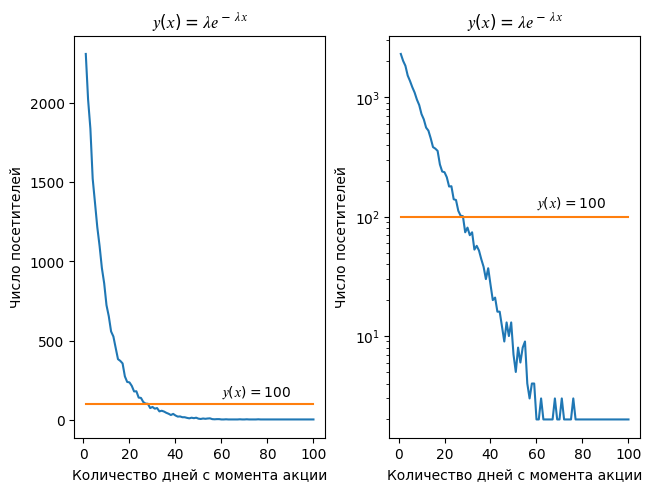

In [33]:
visitors = np.load('visitors.npy')
visitors
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained")

axes[0].plot([i+1 for i in range(100)], visitors)
axes[0].plot([i+1 for i in range(100)], [100 for i in range(100)])
axes[0].text(60, 150, '$𝑦(𝑥)=100$')
axes[0].set_title('$𝑦(𝑥)=𝜆𝑒^−$$^𝜆$$^𝑥$')
axes[0].set_xlabel('Количество дней с момента акции')
axes[0].set_ylabel('Число посетителей')

axes[1].plot([i+1 for i in range(100)], visitors)
axes[1].plot([i+1 for i in range(100)], [100 for i in range(100)])
axes[1].set_yscale("log")
axes[1].text(60, 120, '$𝑦(𝑥)=100$')
axes[1].set_xlabel('Количество дней с момента акции')
axes[1].set_ylabel('Число посетителей')
axes[1].set_title('$𝑦(𝑥)=𝜆𝑒^−$$^𝜆$$^𝑥$')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"